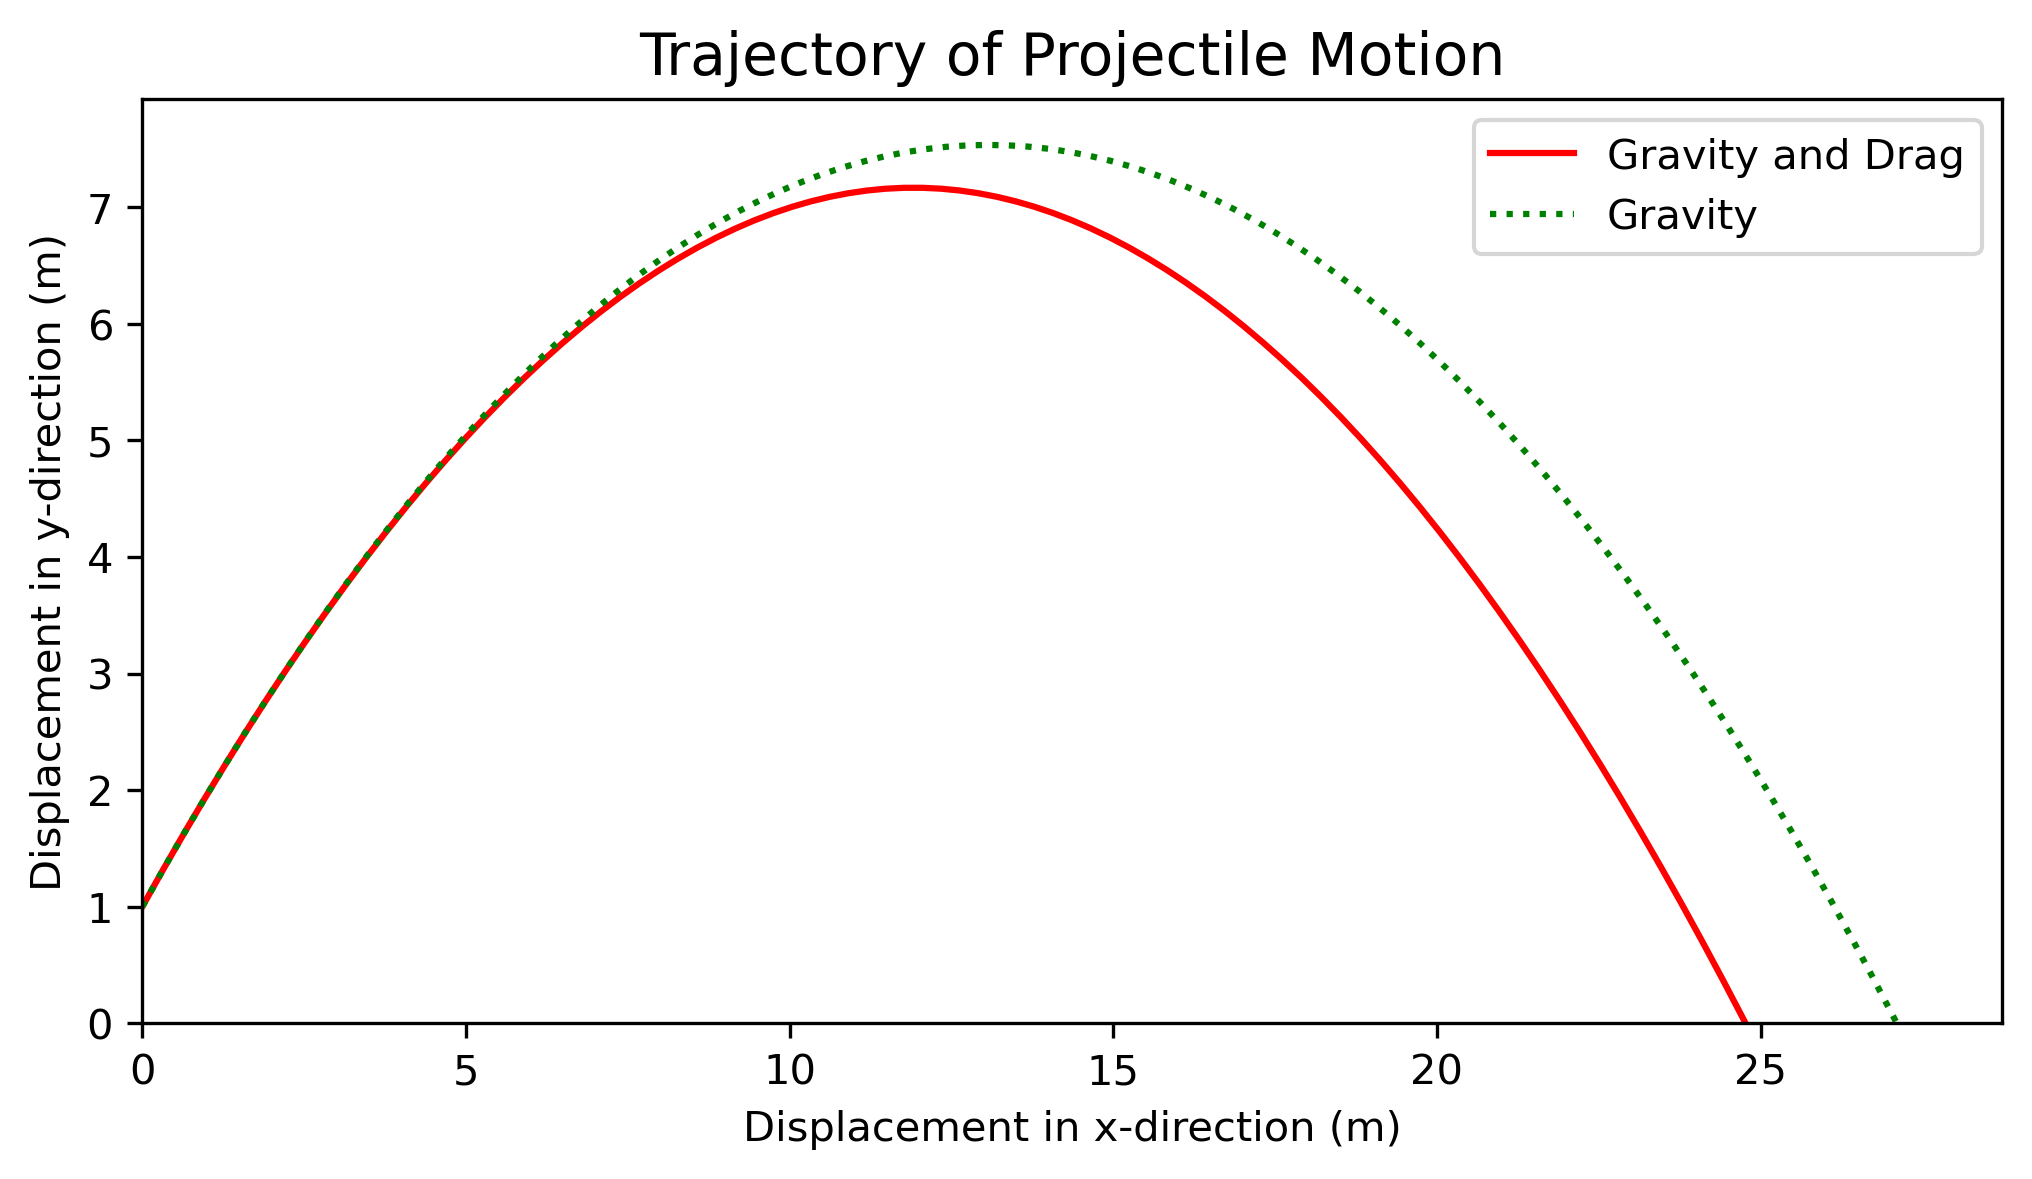

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def projectile(V_initial, theta, drag=True):
    g = 9.81
    m = 0.145
    c2 = 0.0013
    time = np.linspace(0, 100, 10000)
    tof = 0.0
    dt = time[1] - time[0]
    gravity = -g * m
    V_ix = V_initial * np.cos(theta)
    V_iy = V_initial * np.sin(theta)
    v_x = V_ix
    v_y = V_iy
    r_x = 0.0
    r_y = 1
    r_xs = list()
    r_ys = list()
    r_xs.append(r_x)
    r_ys.append(r_y)
    for t in time:
        F_x = 0.0
        F_y = -g
        if (drag == True):
            F_y = F_y - c2*pow(v_y, 2)
            F_x = F_x - c2*pow(v_x, 2) * np.sign(v_y)
        F_y = F_y + gravity

        r_x = r_x + v_x * dt + (F_x / (2 * m)) * dt**2
        r_y = r_y + v_y * dt + (F_y / (2 * m)) * dt**2
        v_x = v_x + (F_x / m) * dt
        v_y = v_y + (F_y / m) * dt
        if (r_y >= 0.0):
            r_xs.append(r_x)
            r_ys.append(r_y)
        else:
            tof = t
            r_xs.append(r_x)
            r_ys.append(r_y)
            break

    return r_xs, r_ys, tof

v = 45
theta = np.pi/4

fig = plt.figure(figsize=(8,4), dpi=300)
r_xs, r_ys, tof = projectile(v, theta, True)
plt.plot(r_xs, r_ys, 'r', label="Gravity and Drag")
r_xs, r_ys, tof = projectile(v, theta, False)
plt.plot(r_xs, r_ys, 'g:', label="Gravity")
plt.title("Trajectory of Projectile Motion", fontsize=14)
plt.xlabel("Displacement in x-direction (m)")
plt.ylabel("Displacement in y-direction (m)")
plt.ylim(bottom=0.0)
plt.xlim(left=0.0)
plt.legend()
plt.show()
